# Updating Wordcloud and Plotly library

In [8]:
pip install wordcloud==1.8.1

In [9]:
pip install plotly==5.3.1

In [10]:
pip install -U kaleido

# Libraries

In [11]:
import pandas as pd
import numpy as np
import re
import os

# DataViz
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Wordcloud
import wordcloud
from wordcloud import WordCloud

# Others
from collections import Counter

# Zipping files to download
import shutil


# Data

In [12]:
#name of the albuns
album_name = []

#each album will be appended to a list
zombie_attack = []
chemical_invasion = []
the_morning_after = []
alien = []
the_meaning_of_life = []
stone_cold_sober = []
two_faced = []
the_tankard = []
disco_destroyer = []
kings_of_beer = []
b_day = []
beast_of_bourbon = []
the_beauty_beer = []
thirst = []
volume_14 = []
girl_cerveza = []
rib = []

In [13]:
# getting each album name and apeeding it to album_name
for album in os.listdir('tankard-lyrics'):
    album_name.append(album)
    
album_name

['2. Chemical Invasion (1987).txt',
 '14. Thirst (2008).txt',
 '8. The Tankard (1995).txt',
 '16. A Girl Called Cerveza (2012).txt',
 '9. Disco Destroyer (1998).txt',
 '6. Stone Cold Sober (1992).txt',
 '13. The Beauty And The Beer (2006).txt',
 '17. Rest In Beer (2014).txt',
 '3. The Morning After (1988).txt',
 '1. Zombie Attack (1986).txt',
 '10. Kings Of Beer (2000).txt',
 '12. Beast Of Bourbon (2004).txt',
 '15. Volume 14 (2010).txt',
 '7. Two-Faced (1994).txt',
 '5. The Meaning Of Life (1990).txt',
 '11. B-Day (2002).txt',
 '4. Alien (1989).txt']

# Albuns Analysis

## Albuns Titles

In [14]:
album_name_analysis = ' '.join(album_name)
album_name_analysis

'2. Chemical Invasion (1987).txt 14. Thirst (2008).txt 8. The Tankard (1995).txt 16. A Girl Called Cerveza (2012).txt 9. Disco Destroyer (1998).txt 6. Stone Cold Sober (1992).txt 13. The Beauty And The Beer (2006).txt 17. Rest In Beer (2014).txt 3. The Morning After (1988).txt 1. Zombie Attack (1986).txt 10. Kings Of Beer (2000).txt 12. Beast Of Bourbon (2004).txt 15. Volume 14 (2010).txt 7. Two-Faced (1994).txt 5. The Meaning Of Life (1990).txt 11. B-Day (2002).txt 4. Alien (1989).txt'

(-0.5, 999.5, 599.5, -0.5)

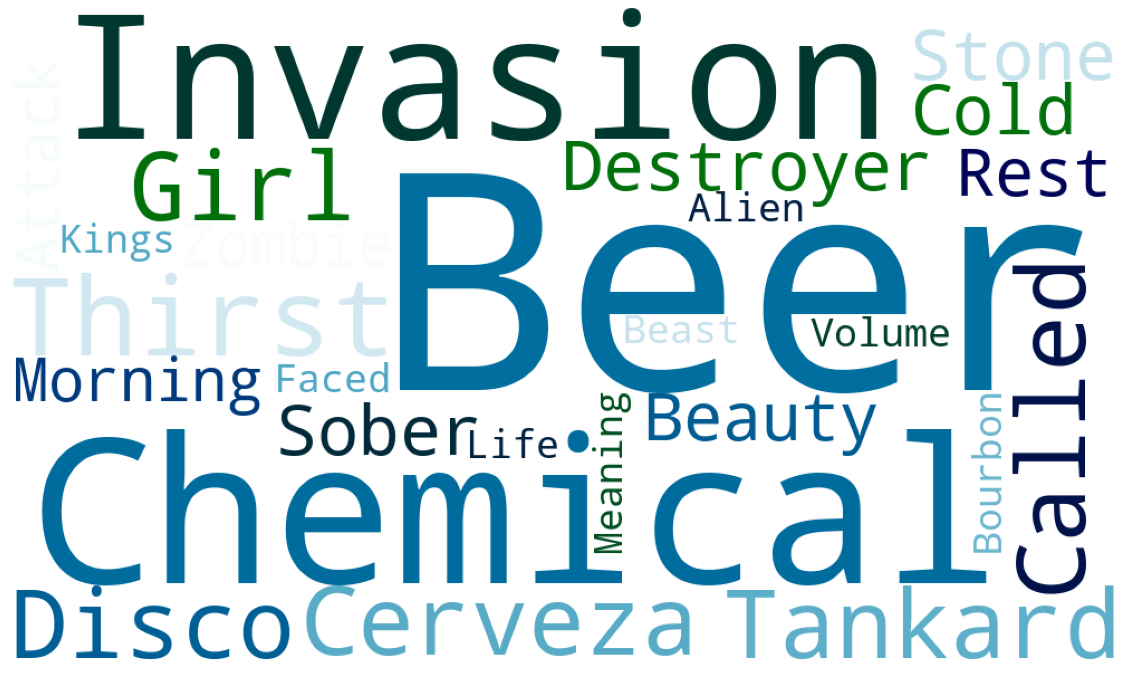

In [15]:
worldcloud_img = WordCloud(width=1000, height=600, background_color='white', colormap='ocean',min_word_length=4).generate(album_name_analysis)
plt.figure(figsize=(20,20))
plt.imshow(worldcloud_img)
plt.axis('off')

## Organizing Albuns

In [16]:
def album_to_list(album_name):
    with open('tankard-lyrics/' + album_name) as album:
        full_album = album.readlines()
        album = []
        for lines in full_album:
            lines = lines.lower()
            album.append(lines)
        return album

In [17]:
rib = album_to_list(album_name[0])
disco_destroyer = album_to_list(album_name[1])
thirst = album_to_list(album_name[2])
chemical_invasion = album_to_list(album_name[3])
stone_cold_sober = album_to_list(album_name[4])
zombie_attack  = album_to_list(album_name[5])
beast_of_bourbon = album_to_list(album_name[6])
the_tankard = album_to_list(album_name[7])
kings_of_beer = album_to_list(album_name[8])
girl_cerveza = album_to_list(album_name[9])
b_day = album_to_list(album_name[10])
alien = album_to_list(album_name[11])
the_meaning_of_life = album_to_list(album_name[12])
the_morning_after = album_to_list(album_name[13])
volume_14 = album_to_list(album_name[14])
the_beauty_beer = album_to_list(album_name[15])
two_faced = album_to_list(album_name[16])

In [18]:
#list for all albuns
tankard = [zombie_attack, chemical_invasion, the_morning_after, alien, the_meaning_of_life, stone_cold_sober, two_faced,
          the_tankard, disco_destroyer, kings_of_beer, b_day, beast_of_bourbon, the_beauty_beer, thirst, volume_14,
          girl_cerveza, rib]

In [19]:
number_of_albuns = len(tankard)
number_of_albuns

17

In [20]:
n_times_beer_albums = album_name_analysis.count('Beer')
n_times_beer_albums

3

In [21]:
stopwords = ['chorus','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

## Each Album Analysis

### Def's for album analysis

In [22]:
def treated_album(album):
  album_treated = []
  for line in album:
    line = re.sub(r'\W+|[0-9]', ' ',line)
    album_treated.append(line)
  album_treated = ''.join(album_treated)
  return album_treated

In [101]:
def dataframe_frequences(album):
  result = dict(Counter(album.split()))
  df = pd.DataFrame.from_dict(result, orient='index')
  df = df.rename(columns={0:'freq'})
  df = df.sort_values('freq', ascending=False)
  df = df.reset_index()
  mask = (df['index'].str.len() >= 4)
  df = df.loc[mask]
  mask2 = (df['index'] != 'your')
  df = df.loc[mask2]
  mask3 = (df['index'] != 'this')
  df = df.loc[mask3]
  mask4 = (df['index'] != 'what')
  df = df.loc[mask4]
  mask5 = (df['index'] != 'with')
  df = df.loc[mask5]
  mask6 = (df['index'] != 'that')
  df = df.loc[mask6]
  mask7 = (df['index'] != 'from')
  df = df.loc[mask7]
  mask8 = (df['index'] != 'gonna')
  df = df.loc[mask8]
  mask9 = (df['index'] != 'been')
  df = df.loc[mask9]
  mask10 = (df['index'] != 'just')
  df = df.loc[mask10]
  mask11 = (df['index'] != 'chorus')
  df = df.loc[mask11]
  mask11 = (df['index'] != 'they')
  df = df.loc[mask11]
  return df

In [24]:
def album_wordcloud(album):
  worldcloud_img = WordCloud(width=1000, height=600, background_color='white', 
                             colormap='ocean', min_word_length=4, stopwords=stopwords, collocations=False).generate(album)
  plt.figure(figsize=(20,20))
  plt.imshow(worldcloud_img)
  plt.axis('off')
  return worldcloud_img

In [25]:
def treemap_plot(df, number_of_words, title):
  fig = px.treemap(df[:number_of_words], 
                  path=[px.Constant("all"), 'index'], 
                  values='freq', title=title,
                  width=1000, height=700)

  fig.update_traces(root_color="white")
  fig.update_traces(textposition='middle center', selector=dict(type='treemap'))

  fig.update_layout(margin = dict(t=50, l=25, r=25, b=25), font_size=20)
  return fig

In [112]:
def total_beer(df):
  print(f'Total number of words: {df.sum()[1]}')
  print(f'Beer quotes times: {df.set_index("index").loc["beer"][0]}')
  print(f'Beer rate: {(df.set_index("index").loc["beer"][0] / df.sum()[1]) * 100:.2f}%')

## Organizing Albuns

In [26]:
# organizing each album in its respective variable

tr_kings_of_beer = treated_album(kings_of_beer)
tr_zombie_attack = treated_album(zombie_attack)
tr_chemical_invasion = treated_album(chemical_invasion)
tr_the_morning_after = treated_album(the_morning_after)
tr_alien = treated_album(alien)
tr_the_meaning_of_life = treated_album(the_meaning_of_life)
tr_stone_cold_sober = treated_album(stone_cold_sober)
tr_two_faced = treated_album(two_faced)
tr_the_tankard = treated_album(the_tankard)
tr_disco_destroyer = treated_album(disco_destroyer)
tr_b_day = treated_album(b_day)
tr_beast_of_bourbon = treated_album(beast_of_bourbon)
tr_the_beauty_beer = treated_album(the_beauty_beer)
tr_thirst = treated_album(thirst)
tr_volume_14 = treated_album(volume_14)
tr_girl_cerveza = treated_album(girl_cerveza)
tr_rib = treated_album(rib)

all_treated = [tr_kings_of_beer,tr_zombie_attack, tr_chemical_invasion, tr_the_morning_after, tr_alien, tr_the_meaning_of_life, tr_stone_cold_sober, tr_two_faced,
tr_the_tankard, tr_disco_destroyer, tr_b_day, tr_beast_of_bourbon, tr_the_beauty_beer, tr_thirst, tr_volume_14,tr_girl_cerveza, tr_rib]

In [102]:
# creating a dataframe of each album

df_kings_of_beer = dataframe_frequences(tr_kings_of_beer)
df_zombie_attack = dataframe_frequences(tr_zombie_attack)
df_chemical_invasion = dataframe_frequences(tr_chemical_invasion)
df_the_morning_after = dataframe_frequences(tr_the_morning_after)
df_alien = dataframe_frequences(tr_alien)
df_the_meaning_of_life = dataframe_frequences(tr_the_meaning_of_life)
df_stone_cold_sober = dataframe_frequences(tr_stone_cold_sober)
df_two_faced = dataframe_frequences(tr_two_faced)
df_the_tankard = dataframe_frequences(tr_the_tankard)
df_disco_destroyer = dataframe_frequences(tr_disco_destroyer)
df_b_day = dataframe_frequences(tr_b_day)
df_beast_of_bourbon = dataframe_frequences(tr_beast_of_bourbon)
df_the_beauty_beer = dataframe_frequences(tr_the_beauty_beer)
df_thirst = dataframe_frequences(tr_thirst)
df_volume_14 = dataframe_frequences(tr_volume_14)
df_girl_cerveza = dataframe_frequences(tr_girl_cerveza)
df_rib = dataframe_frequences(tr_rib)

all_df = [df_kings_of_beer,df_zombie_attack,df_chemical_invasion,df_the_morning_after,df_alien,df_the_meaning_of_life,df_stone_cold_sober,df_two_faced,df_the_tankard,
df_disco_destroyer,df_b_day,df_beast_of_bourbon,df_the_beauty_beer,df_thirst,df_volume_14,df_girl_cerveza,df_rib]

In [28]:
# creating a wordcloud of each album

wc_kings_of_beer = album_wordcloud(tr_kings_of_beer)
wc_zombie_attack = album_wordcloud(tr_zombie_attack)
wc_chemical_invasion = album_wordcloud(tr_chemical_invasion)
wc_the_morning_after = album_wordcloud(tr_the_morning_after)
wc_alien = album_wordcloud(tr_alien)
wc_the_meaning_of_life = album_wordcloud(tr_the_meaning_of_life)
wc_stone_cold_sober = album_wordcloud(tr_stone_cold_sober)
wc_two_faced = album_wordcloud(tr_two_faced)
wc_the_tankard = album_wordcloud(tr_the_tankard)
wc_disco_destroyer = album_wordcloud(tr_disco_destroyer)
wc_b_day = album_wordcloud(tr_b_day)
wc_beast_of_bourbon = album_wordcloud(tr_beast_of_bourbon)
wc_the_beauty_beer = album_wordcloud(tr_the_beauty_beer)
wc_thirst = album_wordcloud(tr_thirst)
wc_volume_14 = album_wordcloud(tr_volume_14)
wc_girl_cerveza = album_wordcloud(tr_girl_cerveza)
wc_rib = album_wordcloud(tr_rib)

all_wc =[wc_kings_of_beer,wc_zombie_attack,wc_chemical_invasion,wc_the_morning_after,wc_alien,wc_the_meaning_of_life,wc_stone_cold_sober,wc_two_faced,wc_the_tankard,
wc_disco_destroyer,wc_b_day,wc_beast_of_bourbon,wc_the_beauty_beer,wc_thirst,wc_volume_14,wc_girl_cerveza,wc_rib]

Output hidden; open in https://colab.research.google.com to view.

In [29]:
# creating a treemap of each data frame album

tm_kings_of_beer = treemap_plot(df_kings_of_beer, 40, 'Kings of Beer')
tm_zombie_attack = treemap_plot(df_zombie_attack, 40, 'Zombie Attack')
tm_chemical_invasion = treemap_plot(df_chemical_invasion, 40, 'Chemical Invasion')
tm_the_morning_after = treemap_plot(df_the_morning_after, 40, 'The Morning After')
tm_alien  = treemap_plot(df_alien, 40, 'Alien')
tm_the_meaning_of_life  = treemap_plot(df_the_meaning_of_life, 40, 'The Meaning of Life')
tm_stone_cold_sober  = treemap_plot(df_stone_cold_sober, 40, 'Stone Cold Sober')
tm_two_faced  = treemap_plot(df_two_faced, 40, 'Two Faced')
tm_the_tankard  = treemap_plot(df_the_tankard, 40, 'The Tankard')
tm_disco_destroyer  = treemap_plot(df_disco_destroyer, 40, 'Disco Distroyer')
tm_b_day  = treemap_plot(df_b_day, 40, 'B-day')
tm_beast_of_bourbon  = treemap_plot(df_beast_of_bourbon, 40, 'The Beast of Bourbon')
tm_the_beauty_beer = treemap_plot(df_the_beauty_beer, 40, 'The Beauty and the Beer')
tm_thirst  = treemap_plot(df_thirst, 40, 'Thirst')
tm_volume_14 = treemap_plot(df_volume_14, 40, 'Volume 14')
tm_girl_cerveza  = treemap_plot(df_girl_cerveza, 40, 'A Girl Called Cerveza')
tm_rib = treemap_plot(df_rib, 40, 'Rest in Beer')

all_tm = [tm_kings_of_beer,tm_zombie_attack,tm_chemical_invasion,tm_the_morning_after,tm_alien,tm_the_meaning_of_life,tm_stone_cold_sober,tm_two_faced,tm_the_tankard,
tm_disco_destroyer,tm_b_day,tm_beast_of_bourbon,tm_the_beauty_beer,tm_thirst,tm_volume_14,tm_girl_cerveza,tm_rib]

### Saving all Files

In [30]:
all_album_names = ['Kings of Beer','Zombie Attack','Chemical Invasion','The Morning After','Alien','The Meaning of Life','Stone Cold Sober',
               'Two Faced','The Tankard','Disco Distroyer','B-day','The Beast of Bourbon','The Beauty and the Beer','Thirst',
               'Volume 14','A Girl Called Cerveza','Rest in Beer']

In [32]:
# word cloud to png
#counter = 0
#for cloud in all_wc:
#  cloud.to_file('wordcloud/' + all_album_names[counter] + '.png')
#  counter = counter + 1

# dataframe to excel
#counter = 0
#for df in all_df:
#  df.to_excel('excel_dataframe/' + all_album_names[counter] + '.xlsx')
#  counter = counter + 1

# treemap to html
#counter = 0
#for tm in all_tm:
#  tm.write_html('treemap/HTML_files/' + all_album_names[counter] + '.html')
#  counter = counter + 1

In [33]:
# zipping files to download

#shutil.make_archive('/content/df', 'zip', '/content/excel_dataframe')
#shutil.make_archive('/content/tm', 'zip', '/content/treemap')
#shutil.make_archive('/content/wc', 'zip', '/content/wordcloud')

In [34]:
for tm in all_tm:
  print(tm.show())

None


None


None


None


None


None


None


None


None


None


None


None


None


None


None


None


None


## More Analysis per Album

# All Musics Analysis

In [ ]:
all = []

for album in tankard:
    for line in album:
        line = re.sub(r'\W+|[0-9]', ' ',line)
        all.append(line)

all

In [36]:
all_words = ' '.join(all)
all_words

' stone cold sober           jurisdiction    our clean cut leaders  in dirty money they deal  transactions undercover  they bribe divert and steal    industry bosses  and the political class  scratching each others back and  kissing each other s ass for cash    where do you see a just society    fuck the law fuck the law  they can do it in your face  fuck the law fuck the law  when the re in a higher place    who said we re equal  laws only goverb the slobs  no one goes after those who  do the white collar jobs    for tax evasion  a fine you maybe will pay  but as a demonstrator  they will look you away for sure    equality is just a fantasy    fuck the law fuck the law  they can do it in your face  fuck the law fuck the law  when the re in a higher place    crime and punishment  the law is sacred  it makes most people behave  but if you have the power  you make the law your slave    there is no justice  that s what the proverb says  the small ones always get caught  the big ones alway

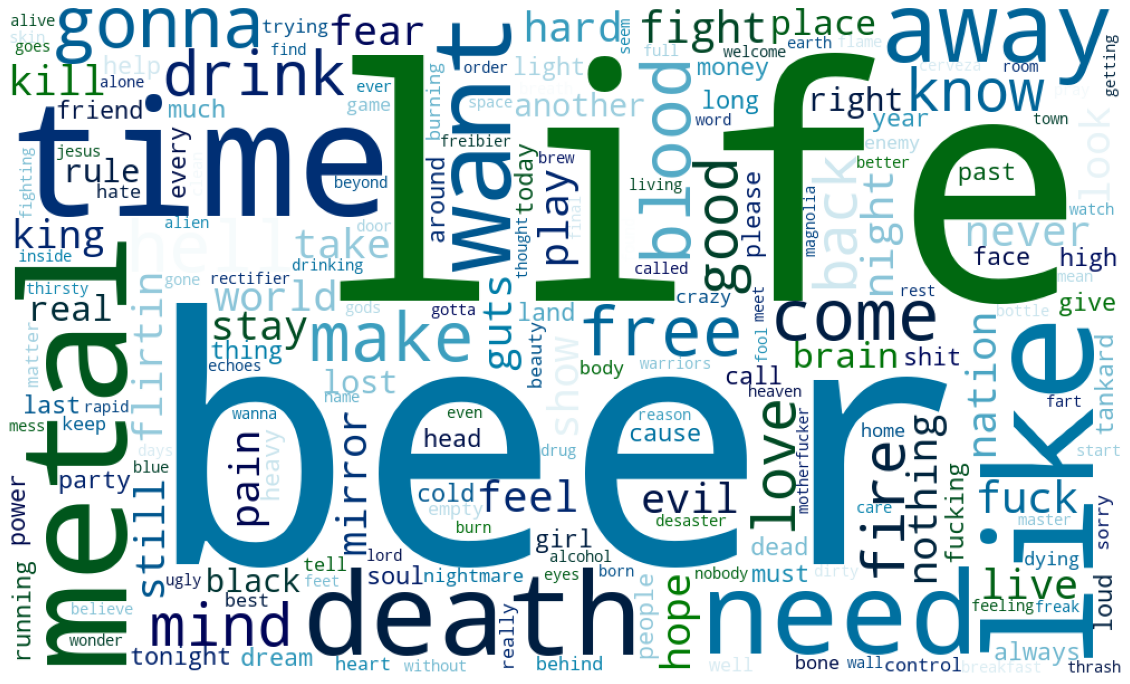

In [37]:
all_musics_wc = album_wordcloud(all_words)
all_musics_wc

In [38]:
all_musics_wc.to_file('all_musics_wc.png')

In [39]:
tankard_frequences = dataframe_frequences(all_words)

In [43]:
total_words = tankard_frequences.sum()[1]
total_words

20855

In [41]:
all_tm = treemap_plot(tankard_frequences, 40, 'Tankard - Analysing all Musics')
#all_tm.write_html('all_musics_tm.html')
all_tm

In [119]:
total_beer(df_rib)

Total number of words: 533
Beer quotes times: 21
Beer rate: 3.94%


In [120]:
beer_rate = {'zombie_attack':0.37, 
             'chemical_invasion':1.23, 
             'the_morning_after':0.38,
             'alien':0.54, 
             'the_meaning_of_life':1.19, 
             'stone_cold_sober':2.01, 
             'two_faced':1.14,
             'the_tankard':1, 
             'disco_destroyer':0.69, 
             'kings_of_beer':2.78, 
             'b_day':1.54, 
             'beast_of_bourbon':1.65, 
             'the_beauty_beer':0.68, 
             'thirst':1.04, 
             'volume_14':1.66,
             'girl_cerveza':6.07, 
             'rib':3.94}

In [110]:
print(f'Beer Rate Thirst: {(11/df_thirst.sum()[1]) * 100:.2f}%')

Beer Rate Thirst: 1.04%


In [115]:
df_thirst.sum()[1]

1054

In [130]:
df_beer_rate = pd.DataFrame.from_dict(beer_rate, orient='index')
df_beer_rate = df_beer_rate.rename(columns={0:'beer_rate'})
df_beer_rate = df_beer_rate.sort_values('beer_rate')

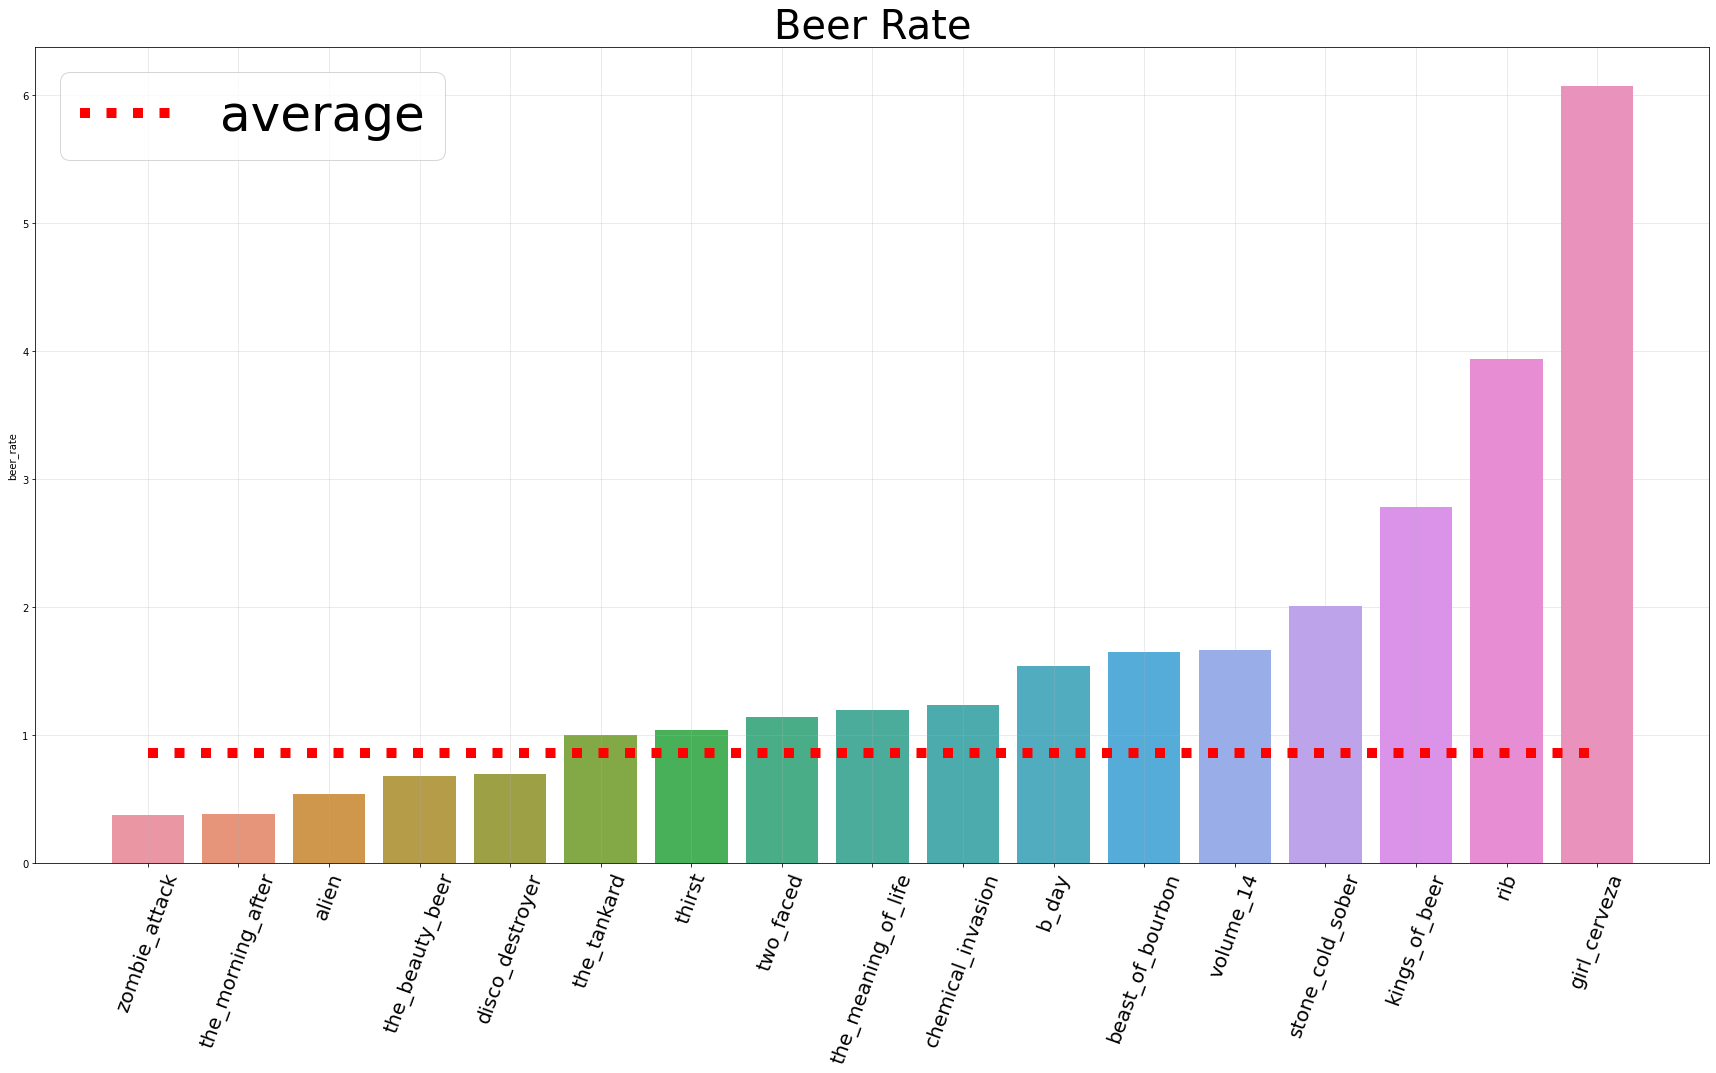

In [151]:
plt.figure(figsize=(30,15))
sns.barplot(data=df_beer_rate,x=df_beer_rate.index, y=df_beer_rate['beer_rate'])
plt.grid(True, alpha=0.3)
plt.title('Beer Rate', fontsize=40, pad=10)
plt.hlines(0.86, xmin=0, xmax=16, linestyles='dotted', color='red', label='average',  linewidth=10)
plt.legend(fontsize=50, loc='upper left')
plt.xticks(fontsize=20,rotation = 70)
plt.savefig('beer_rate.png')
plt.show()